<a href="https://colab.research.google.com/github/shoaibanwar13/Developer_Hub_Internship_tasks/blob/master/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

SyntaxError: invalid syntax (<ipython-input-2-0785a2b5a7b3>, line 7)

In [ ]:
pip install webdriver_manager

In [ ]:

import time
import csv
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Runs in the background without opening a browser
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Amazon URL (Replace this with your target product URL)
url = "https://www.amazon.com/s?k=earbuds"

# Fetch the page with Selenium
driver.get(url)
time.sleep(3)  # Wait for the page to load

# Parse the page with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Close the Selenium WebDriver
driver.quit()

# Extract product data
products = []
for item in soup.find_all('div', {'data-component-type': 's-search-result'}):
    product_name = item.h2.text.strip()
    price = item.find('span', 'a-offscreen')
    price = price.text.strip() if price else 'N/A'
    rating = item.find('span', {'class': 'a-icon-alt'})
    rating = rating.text.strip() if rating else 'No rating'

    products.append({
        'Name': product_name,
        'Price': price,
        'Rating': rating,
    })

# Save the product data to a CSV file
csv_file = "amazon_products.csv"
keys = products[0].keys()

with open(csv_file, 'w', newline='', encoding='utf-8') as output_file:
    dict_writer = csv.DictWriter(output_file, fieldnames=keys)
    dict_writer.writeheader()
    dict_writer.writerows(products)

print(f"Data saved to {csv_file}")

WebDriverException: Message: unknown error: cannot find Chrome binary
Stacktrace:
#0 0x55ca0cac94e3 <unknown>
#1 0x55ca0c7f8c76 <unknown>
#2 0x55ca0c81f757 <unknown>
#3 0x55ca0c81e029 <unknown>
#4 0x55ca0c85cccc <unknown>
#5 0x55ca0c85c47f <unknown>
#6 0x55ca0c853de3 <unknown>
#7 0x55ca0c8292dd <unknown>
#8 0x55ca0c82a34e <unknown>
#9 0x55ca0ca893e4 <unknown>
#10 0x55ca0ca8d3d7 <unknown>
#11 0x55ca0ca97b20 <unknown>
#12 0x55ca0ca8e023 <unknown>
#13 0x55ca0ca5c1aa <unknown>
#14 0x55ca0cab26b8 <unknown>
#15 0x55ca0cab2847 <unknown>
#16 0x55ca0cac2243 <unknown>
#17 0x79f1a99eeac3 <unknown>


In [ ]:

pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(sentences)
print(embeddings)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# You can use seaborn's built-in Iris dataset for simplicity
iris = sns.load_dataset('iris')

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(iris.head())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
#  Basic Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:")
print(iris.describe())


Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(iris.isnull().sum())


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
# Check data types
print("\nData Types:")
print(iris.dtypes)


Data Types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [ ]:
# Data Cleaning (for this dataset, there may be no missing or incorrect values)
# If there were missing values, you'd handle them like this:
# iris.fillna(iris.mean(), inplace=True)

<Figure size 1000x600 with 0 Axes>

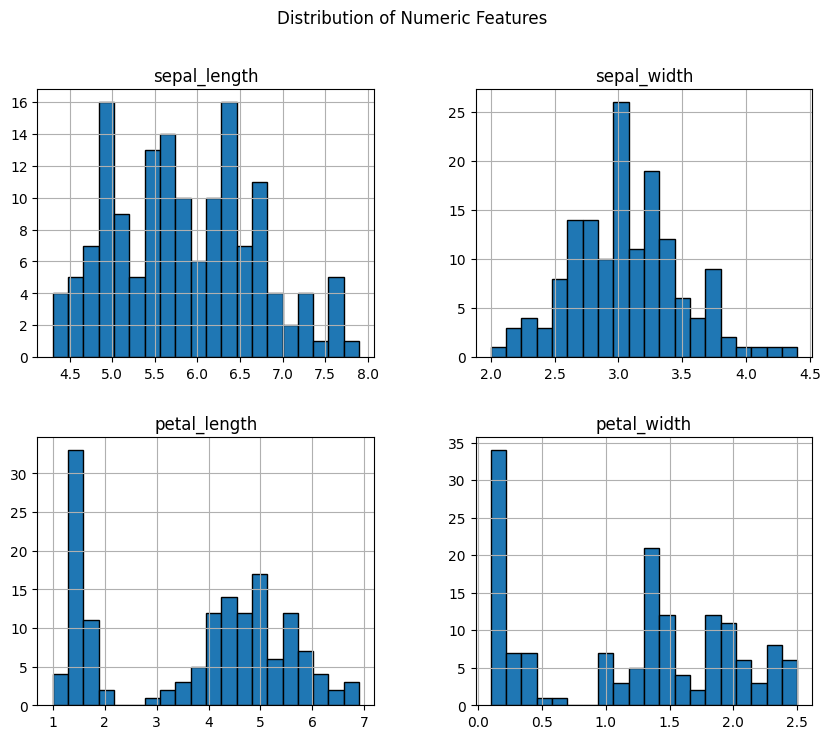

In [ ]:
# Data Visualization
# Histogram for each numeric feature
plt.figure(figsize=(10, 6))
iris.drop('species', axis=1).hist(bins=20, edgecolor='black', figsize=(10, 8))
plt.suptitle('Distribution of Numeric Features')
plt.show()

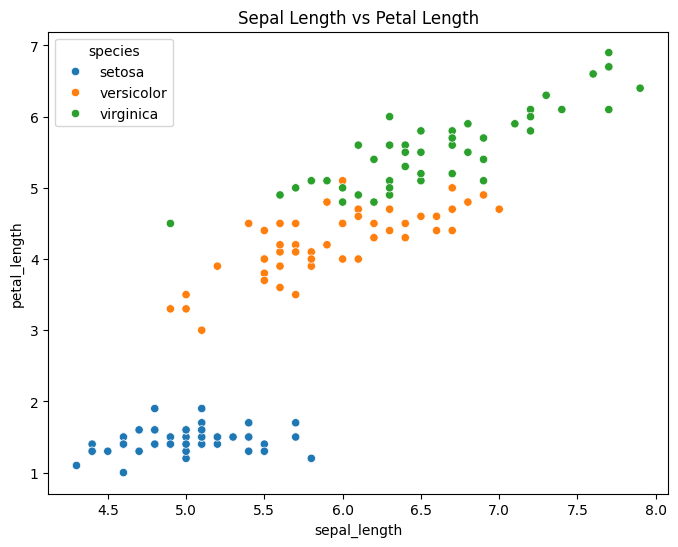

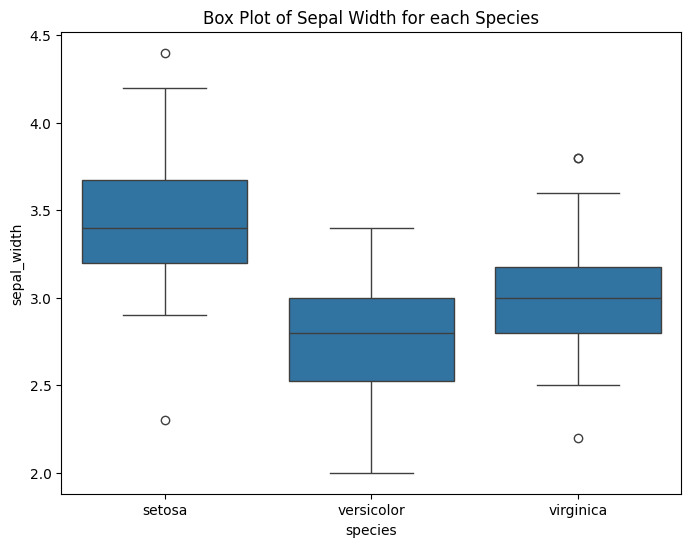

In [ ]:
#Scater plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.title('Sepal Length vs Petal Length')
plt.show()

#Box Plot to visualize the spread of data
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Box Plot of Sepal Width for each Species')
plt.show()

In [ ]:
from transformers import pipeline

In [ ]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
ARTICLE = """
It appears that no specific code can be directly extracted from the document using a search tool. If you'd like, I can go through sections of the document and help interpret the methodology and create a sample code for training your model.
Would you like me to summarize the document first or dive into specific parts like dataset handling, model selection, or the training process? Let me know how you'd like to proceed!
"""

In [ ]:
summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)

Your max_length is set to 130, but your input_length is only 88. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)


[{'summary_text': " It appears that no specific code can be directly extracted from the document using a search tool . If you'd like to go through sections of the document and help interpret it, I can create a sample code for training your model ."}]

In [ ]:

import random
import jieba  # For Chinese tokenization

class MarkovChain:
    def __init__(self):
        self.chain = {}

    def add_to_chain(self, words):
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            if current_word in self.chain:
                self.chain[current_word].append(next_word)
            else:
                self.chain[current_word] = [next_word]

    def generate_text(self, length=50):
        current_word = random.choice(list(self.chain.keys()))
        sentence = [current_word]

        for _ in range(length - 1):
            next_words = self.chain.get(current_word, None)
            if not next_words:
                break
            next_word = random.choice(next_words)
            sentence.append(next_word)
            current_word = next_word

        return ''.join(sentence)  # For languages like Chinese, join without spaces

# Example usage:

# Input Chinese text
input_text = """


马尔可夫链是一种随机模型，常用于预测系统中的下一个状态。它们广泛应用于文本、天气等序列数据的建模。本示例展示了如何在Python中实现一个简单的马尔可夫链。
"""

# Tokenize Chinese text with jieba
words = list(jieba.cut(input_text))

# Initialize the Markov chain
markov_chain = MarkovChain()

# Add words to the chain
markov_chain.add_to_chain(words)

# Generate random text based on the Markov chain
generated_text = markov_chain.generate_text(length=20)

print("Generated text:")
print(generated_text)

Generated text:
状态。它们广泛应用于文本、天气等序列数据的建模。它们广泛应用于文本、天气


In [ ]:
import random

class MarkovChain:
    def __init__(self):
        self.chain = {}

    def add_to_chain(self, words):
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            if current_word in self.chain:
                self.chain[current_word].append(next_word)
            else:
                self.chain[current_word] = [next_word]

    def generate_text(self, length=50):
        # Start with a random word from the chain
        current_word = random.choice(list(self.chain.keys()))
        sentence = [current_word]

        for _ in range(length - 1):
            next_words = self.chain.get(current_word, None)
            if not next_words:
                break  # No next words, stop generating
            next_word = random.choice(next_words)
            sentence.append(next_word)
            current_word = next_word

        return ' '.join(sentence)

# Tokenization function to handle different languages
def tokenize_text(text, language):
    # For English, Dutch, German, and Spanish, we can use simple split on spaces.
    # You may add more sophisticated tokenization for specific languages if needed.
    return text.split()

# Example function to build and generate text from a Markov Chain for different languages
def generate_markov_text(input_text, language, length=50):
    # Tokenize the text based on the language
    words = tokenize_text(input_text, language)

    # Initialize the Markov chain
    markov_chain = MarkovChain()

    # Add words to the chain
    markov_chain.add_to_chain(words)

    # Generate random text based on the Markov chain
    return markov_chain.generate_text(length=length)

# Example usage:
# Dutch text
dutch_text = """
Markovketens zijn een stochastisch model dat wordt gebruikt om de volgende toestand in een systeem te voorspellen.
Ze worden veel gebruikt voor het modelleren van sequentiële gegevens zoals tekst en weersvoorspellingen.
"""

# German text
german_text = """
Markow-Ketten sind ein stochastisches Modell, das verwendet wird, um den nächsten Zustand in einem System vorherzusagen.
Sie werden häufig zur Modellierung sequenzieller Daten wie Text und Wetter verwendet.
"""

# Spanish text
spanish_text = """
Las cadenas de Markov son un modelo estocástico que se utiliza para predecir el siguiente estado en un sistema.
Se utilizan ampliamente para modelar datos secuenciales como texto y el clima.
"""

# English text
english_text = """
Markov chains are a stochastic model used to predict the next state in a system.
They are widely used for modeling sequential data like text and weather predictions.
"""

# Generate text in different languages
generated_dutch = generate_markov_text(dutch_text, 'Dutch', length=20)
generated_german = generate_markov_text(german_text, 'German', length=20)
generated_spanish = generate_markov_text(spanish_text, 'Spanish', length=20)
generated_english = generate_markov_text(english_text, 'English', length=20)

print("Generated Dutch Text:")
print(generated_dutch)
print("\nGenerated German Text:")
print(generated_german)
print("\nGenerated Spanish Text:")
print(generated_spanish)
print("\nGenerated English Text:")
print(generated_english)

Generated Dutch Text:
toestand in een systeem te voorspellen. Ze worden veel gebruikt voor het modelleren van sequentiële gegevens zoals tekst en weersvoorspellingen.

Generated German Text:
und Wetter verwendet.

Generated Spanish Text:
Las cadenas de Markov son un sistema. Se utilizan ampliamente para modelar datos secuenciales como texto y el siguiente estado

Generated English Text:
chains are a system. They are a stochastic model used for modeling sequential data like text and weather predictions.


In [ ]:
import random

class MarkovChain:
    def __init__(self):
        self.chain = {}

    def add_to_chain(self, words):
        for i in range(len(words) - 1):
            current_word = words[i]
            next_word = words[i + 1]
            if current_word in self.chain:
                self.chain[current_word].append(next_word)
            else:
                self.chain[current_word] = [next_word]

    def generate_text(self, length=50):
        # Start with a random word from the chain
        current_word = random.choice(list(self.chain.keys()))
        sentence = [current_word]

        for _ in range(length - 1):
            next_words = self.chain.get(current_word, None)
            if not next_words:
                break  # No next words, stop generating
            next_word = random.choice(next_words)
            sentence.append(next_word)
            current_word = next_word

        return ' '.join(sentence)

# Tokenization function to handle different languages
def tokenize_text(text, language):
    # For English, Dutch, German, and Spanish, we can use simple split on spaces.
    return text.split()

# Example function to build and generate text from a Markov Chain for different languages
def generate_markov_text(input_text, language, length=50, outputs=5):
    # Tokenize the text based on the language
    words = tokenize_text(input_text, language)

    # Initialize the Markov chain
    markov_chain = MarkovChain()

    # Add words to the chain
    markov_chain.add_to_chain(words)

    # Generate multiple outputs
    texts = [markov_chain.generate_text(length=length) for _ in range(outputs)]

    return texts

# Example usage:
# Dutch text
dutch_text = """
Markovketens zijn een stochastisch model dat wordt gebruikt om de volgende toestand in een systeem te voorspellen.
Ze worden veel gebruikt voor het modelleren van sequentiële gegevens zoals tekst en weersvoorspellingen.
"""

# German text
german_text = """
Markow-Ketten sind ein stochastisches Modell, das verwendet wird, um den nächsten Zustand in einem System vorherzusagen.
Sie werden häufig zur Modellierung sequenzieller Daten wie Text und Wetter verwendet.
"""

# Spanish text
spanish_text = """
Las cadenas de Markov son un modelo estocástico que se utiliza para predecir el siguiente estado en un sistema.
Se utilizan ampliamente para modelar datos secuenciales como texto y el clima.
"""

# English text
english_text = """
Markov chains are a stochastic model used to predict the next state in a system.
They are widely used for modeling sequential data like text and weather predictions.
"""

# Generate 5 texts for each language
generated_dutch = generate_markov_text(dutch_text, 'Dutch', length=20, outputs=5)
generated_german = generate_markov_text(german_text, 'German', length=20, outputs=5)
generated_spanish = generate_markov_text(spanish_text, 'Spanish', length=20, outputs=5)
generated_english = generate_markov_text(english_text, 'English', length=20, outputs=5)

# Print 5 outputs for each language
print("Generated Dutch Texts:")
for i, text in enumerate(generated_dutch, 1):
    print(f"Output {i}: {text}\n")

print("Generated German Texts:")
for i, text in enumerate(generated_german, 1):
    print(f"Output {i}: {text}\n")

print("Generated Spanish Texts:")
for i, text in enumerate(generated_spanish, 1):
    print(f"Output {i}: {text}\n")

print("Generated English Texts:")
for i, text in enumerate(generated_english, 1):
    print(f"Output {i}: {text}\n")

Generated Dutch Texts:
Output 1: toestand in een stochastisch model dat wordt gebruikt om de volgende toestand in een stochastisch model dat wordt gebruikt om

Output 2: wordt gebruikt om de volgende toestand in een stochastisch model dat wordt gebruikt voor het modelleren van sequentiële gegevens zoals

Output 3: volgende toestand in een systeem te voorspellen. Ze worden veel gebruikt om de volgende toestand in een stochastisch model dat

Output 4: de volgende toestand in een systeem te voorspellen. Ze worden veel gebruikt voor het modelleren van sequentiële gegevens zoals tekst

Output 5: te voorspellen. Ze worden veel gebruikt om de volgende toestand in een systeem te voorspellen. Ze worden veel gebruikt om

Generated German Texts:
Output 1: den nächsten Zustand in einem System vorherzusagen. Sie werden häufig zur Modellierung sequenzieller Daten wie Text und Wetter verwendet.

Output 2: um den nächsten Zustand in einem System vorherzusagen. Sie werden häufig zur Modellierung sequen

In [ ]:




pip install jieba